In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("/content/simpleStudents_score_dataset.csv")

In [4]:
df.head()

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,Sample_Papers_Practiced,Final_Exam_Score
0,7,42,Yes,4,7,64.20
1,4,78,Yes,4,12,70.29
2,8,45,Yes,5,14,60.78
3,5,47,No,6,8,46.59
4,7,66,No,7,6,56.99


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Hours_Studied               150 non-null    int64  
 1   Previous_Scores             150 non-null    int64  
 2   Extracurricular_Activities  150 non-null    object 
 3   Sleep_Hours                 150 non-null    int64  
 4   Sample_Papers_Practiced     150 non-null    int64  
 5   Final_Exam_Score            150 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 7.2+ KB


In [6]:
df.describe()

,Hours_Studied,Previous_Scores,Sleep_Hours,Sample_Papers_Practiced,Final_Exam_Score
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.813333,67.613333,6.393333,7.426667,61.979333
std,2.867046,16.694968,1.650286,4.737890,17.579170
min,1.000000,40.000000,4.000000,0.000000,22.470000
25%,3.000000,55.000000,5.000000,4.000000,52.260000
50%,6.000000,70.500000,6.000000,7.500000,62.930000
75%,8.000000,80.000000,8.000000,11.000000,74.587500
max,10.000000,95.000000,9.000000,15.000000,100.000000


In [7]:
df.describe(include = ["object"])

,Extracurricular_Activities
count,150
unique,2
top,Yes
freq,79


In [8]:
df.isna().sum()

,0
Hours_Studied,0
Previous_Scores,0
Extracurricular_Activities,0
Sleep_Hours,0
Sample_Papers_Practiced,0
Final_Exam_Score,0


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.columns

Index(['Hours_Studied', 'Previous_Scores', 'Extracurricular_Activities',
       'Sleep_Hours', 'Sample_Papers_Practiced', 'Final_Exam_Score'],
      dtype='object')

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

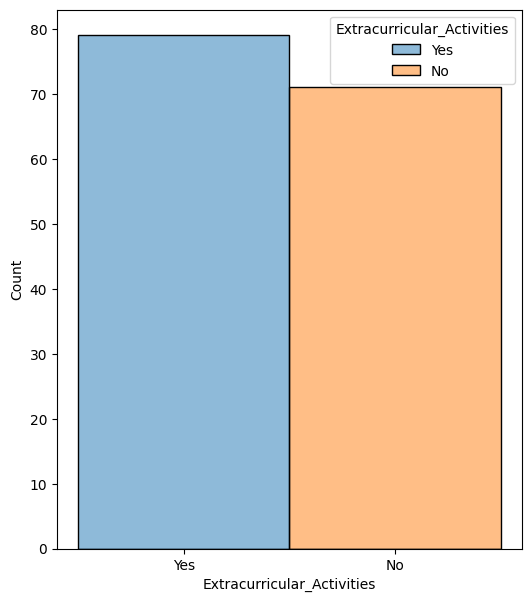

In [19]:
plt.figure(figsize = (6, 7))
sns.histplot(x = "Extracurricular_Activities", data = df, hue = "Extracurricular_Activities")
plt.show()

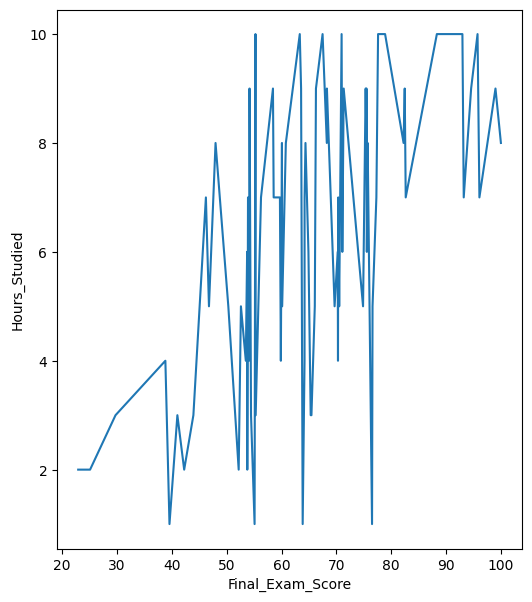

In [40]:
curr_data = df[df["Extracurricular_Activities"] == "Yes"]
plt.figure(figsize = (6, 7))
sns.lineplot(x = "Final_Exam_Score", y = "Hours_Studied", data =  curr_data)
plt.show()

Looks like there is noise in data lets check with the boxplot

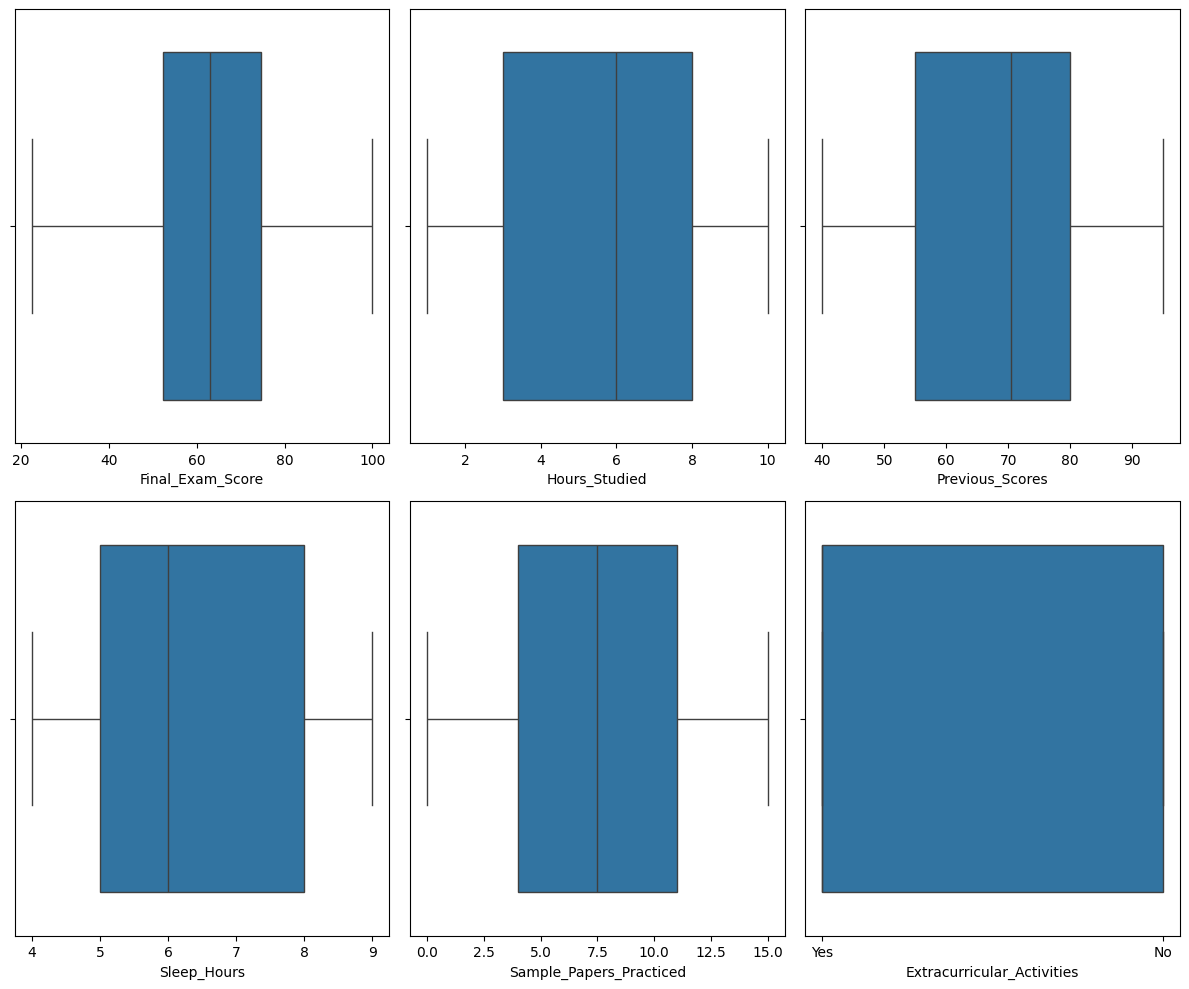

In [53]:
fig, ax = plt.subplots(2, 3, figsize=(12, 10))
ax = ax.flatten()

sns.boxplot(x="Final_Exam_Score", data=df, ax=ax[0])
sns.boxplot(x="Hours_Studied", data=df, ax=ax[1])
sns.boxplot(x="Previous_Scores", data=df, ax=ax[2])
sns.boxplot(x="Sleep_Hours", data=df, ax=ax[3])
sns.boxplot(x="Sample_Papers_Practiced", data=df, ax=ax[4])
sns.boxplot(x="Extracurricular_Activities", data=df, ax=ax[5])

plt.tight_layout()
plt.show()

Data is perfectly fine.. there might be some actual variation in reallife

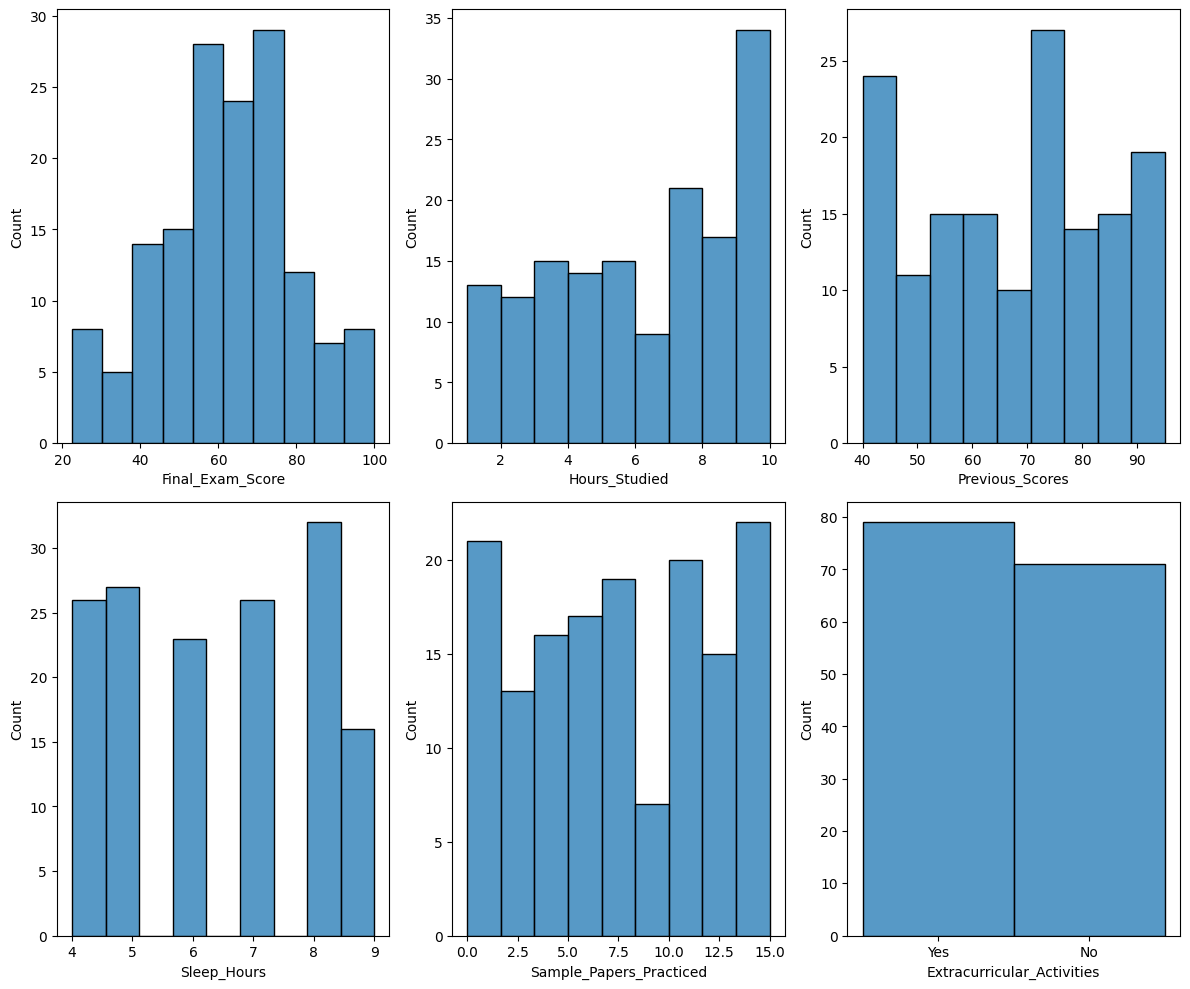

In [58]:
fig, ax = plt.subplots(2, 3, figsize=(12, 10))
ax = ax.flatten()
sns.histplot(x="Final_Exam_Score", data=df, ax=ax[0])
sns.histplot(x="Hours_Studied", data=df, ax=ax[1])
sns.histplot(x="Previous_Scores", data=df, ax=ax[2])
sns.histplot(x="Sleep_Hours", data=df, ax=ax[3])
sns.histplot(x="Sample_Papers_Practiced", data=df, ax=ax[4])
sns.histplot(x="Extracurricular_Activities", data=df, ax=ax[5])

plt.tight_layout()
plt.show()

We can see eam score is bell shaped while modt of the people actually study 10 hours

In [48]:
number_df = df.select_dtypes(np.number)
number_df.head()

,Hours_Studied,Previous_Scores,Sleep_Hours,Sample_Papers_Practiced,Final_Exam_Score
0,7,42,4,7,64.20
1,4,78,4,12,70.29
2,8,45,5,14,60.78
3,5,47,6,8,46.59
4,7,66,7,6,56.99


In [61]:
skewness = number_df.skew()
kurtosis = number_df.kurtosis()

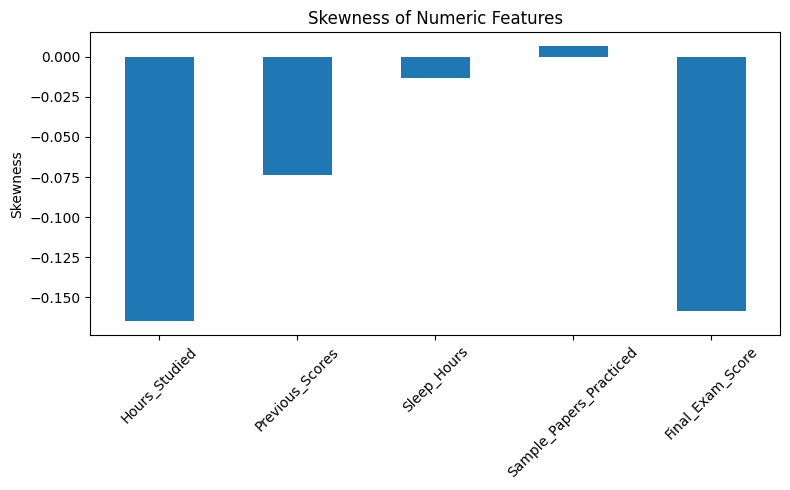

In [66]:
skewness = number_df.skew()

# Using pandas built-in plot
skewness.plot(kind="bar", figsize=(8, 5))

plt.title("Skewness of Numeric Features")
plt.ylabel("Skewness")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


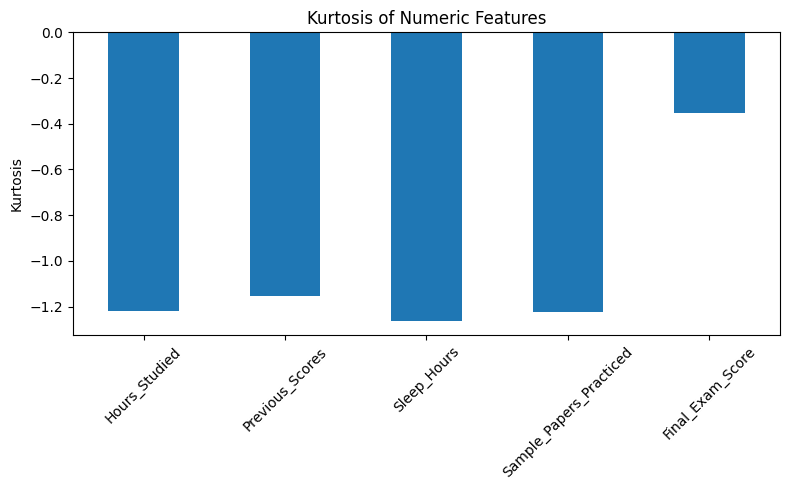

In [69]:
Kurtosis = number_df.kurtosis()

# Using pandas built-in plot
Kurtosis.plot(kind="bar", figsize=(8, 5))

plt.title("Kurtosis of Numeric Features")
plt.ylabel("Kurtosis")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


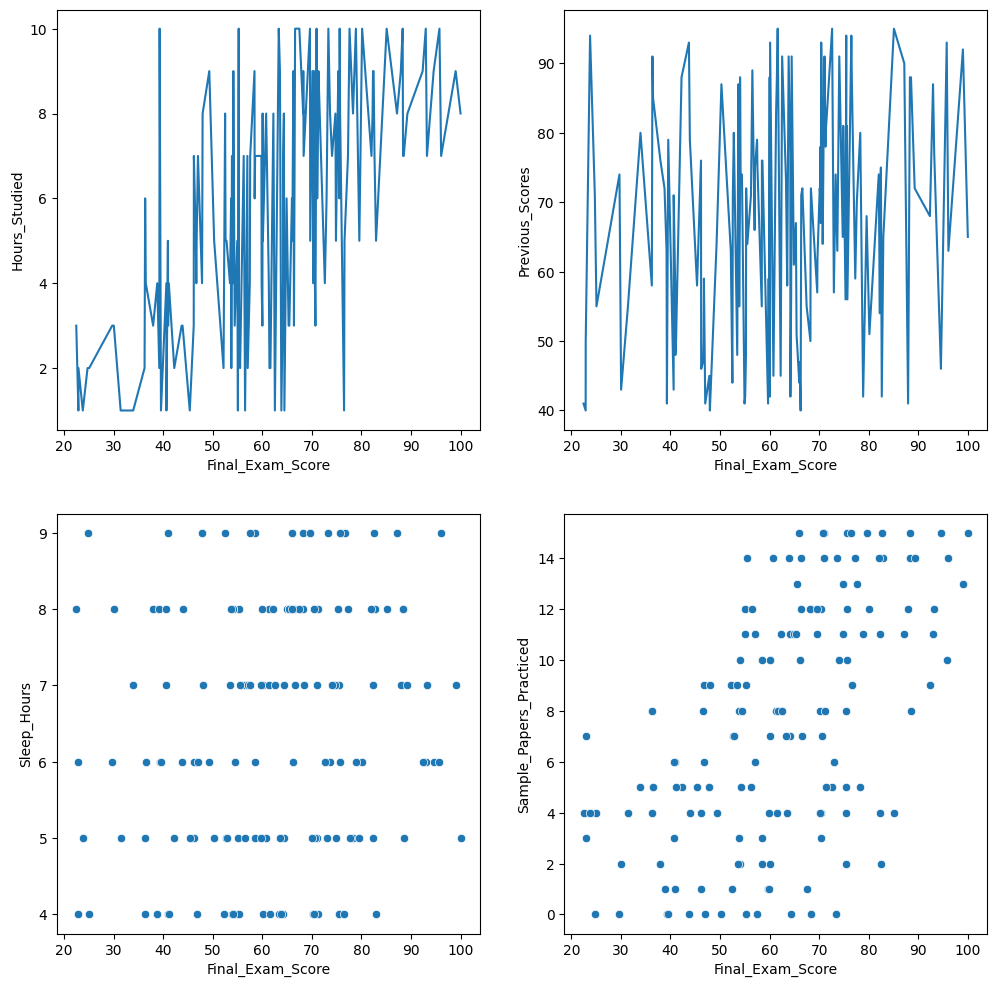

In [77]:
fig, ax = plt.subplots(2,2, figsize = (12, 12))
ax = ax.flatten()
sns.lineplot(x = "Final_Exam_Score", y = "Hours_Studied", data = df, ax = ax[0])
sns.lineplot(x = "Final_Exam_Score", y = "Previous_Scores", data = df, ax = ax[1])
sns.scatterplot(x = "Final_Exam_Score", y = "Sleep_Hours", data = df, ax = ax[2])
sns.scatterplot(x = "Final_Exam_Score", y = "Sample_Papers_Practiced", data = df, ax = ax[3])
plt.show()

Data looks very random, but still those who have studied more and practiced sample paper are tend to score more

In [78]:
corr = number_df.corr()

<Axes: >

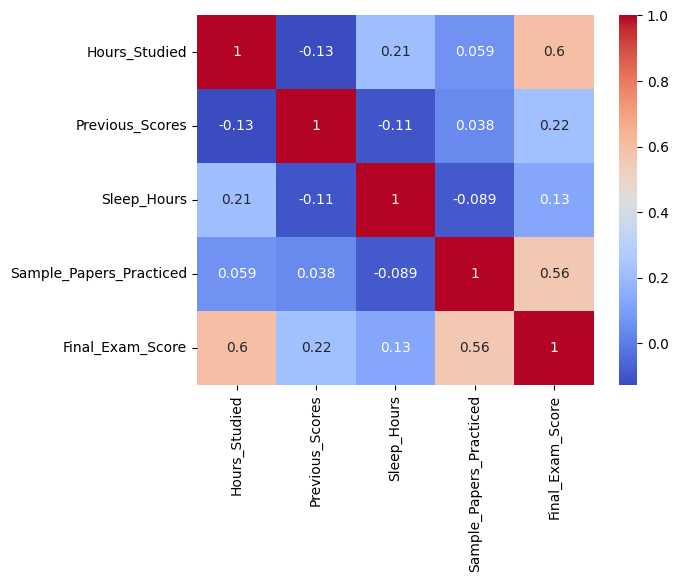

In [79]:
sns.heatmap(corr, annot = True, cmap = "coolwarm")

In [80]:
df = pd.get_dummies(df)

In [89]:
X = df.drop(columns = "Final_Exam_Score")
y = df["Final_Exam_Score"]

In [94]:
from sklearn.preprocessing import MinMaxScaler

In [95]:
model = MinMaxScaler()
arr = model.fit_transform(X)
X = pd.DataFrame(arr, columns = X.columns)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [97]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [122]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)
print(mse)
print(r2_lr)

257.76711663875096
0.6766048806764955


In [123]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_dec = mean_squared_error(y_test, y_pred)
r2_dec = r2_score(y_test, y_pred)
print(mse)
print(r2_dec)

257.76711663875096
0.46155154519172203


In [126]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_for = mean_squared_error(y_test, y_pred)
r2_for = r2_score(y_test, y_pred)
print(mse)
print(r2_for)

257.76711663875096
0.5295895302727298


In [127]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_gbr = mean_squared_error(y_test, y_pred)
r2_gbr = r2_score(y_test, y_pred)
print(mse)
print(r2_gbr)

257.76711663875096
0.5204083654885132


In [128]:
model = SVR()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred)
r2_svr = r2_score(y_test, y_pred)
print(mse)
print(r2_svr)

257.76711663875096
0.27656917486712473


In [129]:
mse_arr = []
mse_arr.append(mse_lr)
mse_arr.append(mse_dec)
mse_arr.append(mse_for)
mse_arr.append(mse_gbr)
mse_arr.append(mse_svr)

r2_arr = []
r2_arr.append(r2_lr)
r2_arr.append(r2_dec)
r2_arr.append(r2_for)
r2_arr.append(r2_gbr)
r2_arr.append(r2_svr)

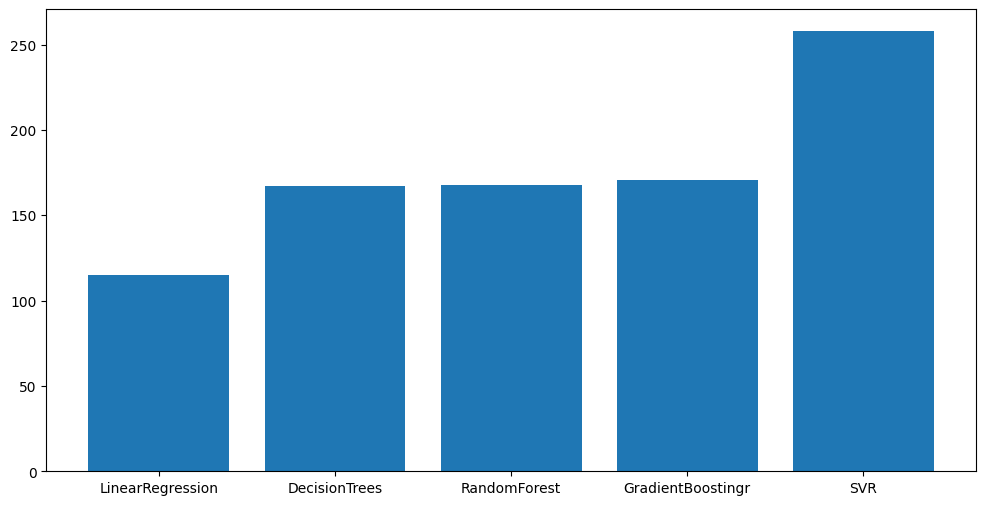

In [120]:
plt.figure(figsize =(12, 6))
plt.bar(["LinearRegression", "DecisionTrees", "RandomForest", "GradientBoostingr", "SVR"], mse_arr)
plt.show()

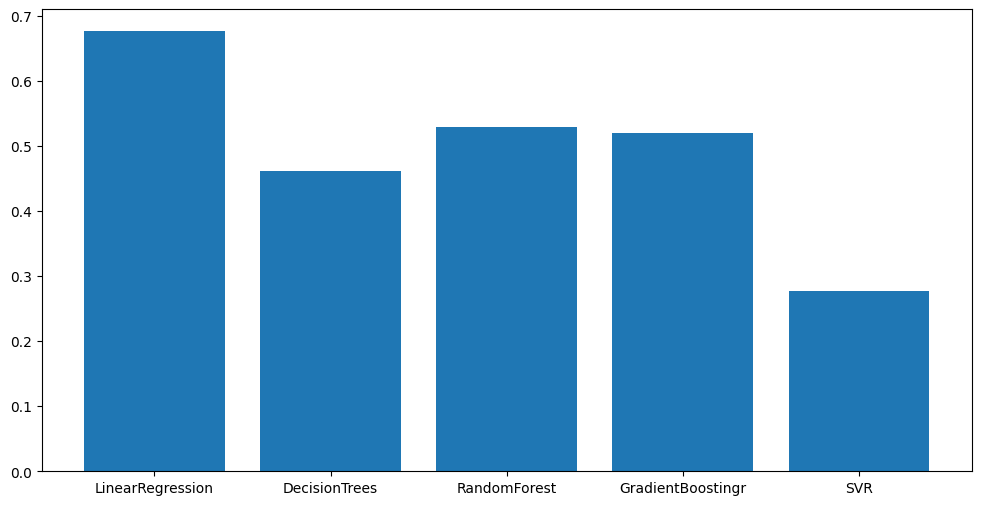

In [130]:
plt.figure(figsize =(12, 6))
plt.bar(["LinearRegression", "DecisionTrees", "RandomForest", "GradientBoostingr", "SVR"], r2_arr)
plt.show()